In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
import string

happiness_path = "../Resources/Gallup2018.csv"

happiness_df = pd.read_csv(happiness_path)


Personal_Income_by_State_2018_path = "../Resources/Personal Income by State 2018.csv"

Personal_Income_df = pd.read_csv(Personal_Income_by_State_2018_path)


#US_State_Tax_Rate_2018_path = "../Resources/US State Tax Rate 2018.csv"

#State_Tax_Rate_df = pd.read_csv(US_State_Tax_Rate_2018_path)


#Poverty_rate_by_US_State_2018_path = "../Resources/Poverty rate by US State 2018.csv"

#Poverty_Rate_df = pd.read_csv(Poverty_rate_by_US_State_2018_path)


#Unemployment_rate_per_US_State_path = "../Resources/Unemployment rate per US State.csv"

#Unemployment_Rate_df = pd.read_csv(Unemployment_rate_per_US_State_path)

In [3]:
Income_merge_df = pd.merge(Personal_Income_df, happiness_df, on='State', how='inner')
Income_merge_df

,State,LineCode,Description,Average Personal Income,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical
0,Alabama,3.0,Per capita personal income (dollars) 2/,41607.0,1656,59.9,44,18,37,45,17,48
1,Alaska,3.0,Per capita personal income (dollars) 2/,59783.0,212,63.9,3,5,8,2,23,1
2,Arizona,3.0,Per capita personal income (dollars) 2/,45299.0,2347,62.1,15,8,11,26,15,17
3,Arkansas,3.0,Per capita personal income (dollars) 2/,43661.0,1129,58.7,49,49,50,50,38,46
4,California,3.0,Per capita personal income (dollars) 2/,61509.0,10542,62.2,14,22,10,27,39,9
5,Colorado,3.0,Per capita personal income (dollars) 2/,58471.0,2316,63.4,6,11,6,10,11,2
6,Connecticut,3.0,Per capita personal income (dollars) 2/,73176.0,1415,62.1,16,38,16,21,41,5
7,Delaware,3.0,Per capita personal income (dollars) 2/,52839.0,386,62.9,8,26,2,4,22,10
8,Florida,3.0,Per capita personal income (dollars) 2/,51444.0,6928,61.8,20,13,5,36,21,16
9,Georgia,3.0,Per capita personal income (dollars) 2/,46824.0,2994,61.7,23,17,15,40,28,21


In [4]:
df = Income_merge_df
del df["LineCode"]
del df["Description"]
del df["2018 sample size"]
del df["Social"]
del df["Community"]
del df["Physical"]
Income_merge_df

,State,Average Personal Income,Well-Being Index,Well-Being Index Rank,Career,Financial
0,Alabama,41607.0,59.9,44,18,45
1,Alaska,59783.0,63.9,3,5,2
2,Arizona,45299.0,62.1,15,8,26
3,Arkansas,43661.0,58.7,49,49,50
4,California,61509.0,62.2,14,22,27
5,Colorado,58471.0,63.4,6,11,10
6,Connecticut,73176.0,62.1,16,38,21
7,Delaware,52839.0,62.9,8,26,4
8,Florida,51444.0,61.8,20,13,36
9,Georgia,46824.0,61.7,23,17,40


In [5]:
Income_merge_df.describe()

,Average Personal Income,Well-Being Index,Well-Being Index Rank,Career,Financial
count,50.000000,50.000000,50.00000,50.00000,50.00000
mean,51784.140000,61.466000,25.50000,25.50000,25.50000
std,7644.107988,1.488817,14.57738,14.57738,14.57738
min,37927.000000,57.000000,1.00000,1.00000,1.00000
25%,46561.500000,60.650000,13.25000,13.25000,13.25000
50%,50814.500000,61.500000,25.50000,25.50000,25.50000
75%,56554.000000,62.425000,37.75000,37.75000,37.75000
max,73176.000000,64.600000,50.00000,50.00000,50.00000


In [6]:
Income_merge_df = Income_merge_df.set_index('State')

In [13]:
Income_merge_df.head()

,Average Personal Income,Well-Being Index,Well-Being Index Rank,Career,Financial
State,,,,,
Alabama,41607.0,59.9,44,18,45
Alaska,59783.0,63.9,3,5,2
Arizona,45299.0,62.1,15,8,26
Arkansas,43661.0,58.7,49,49,50
California,61509.0,62.2,14,22,27


In [14]:
well_being_index_rank = Income_merge_df.iloc[:,2]
average_personal_income = Income_merge_df.iloc[:,0]

In [15]:
well_being_index_rank

State
Alabama           44
Alaska             3
Arizona           15
Arkansas          49
California        14
Colorado           6
Connecticut       16
Delaware           8
Florida           20
Georgia           23
Hawaii             1
Idaho             22
Illinois          42
Indiana           41
Iowa              26
Kansas            35
Kentucky          48
Louisiana         43
Maine             21
Maryland          32
Massachusetts     17
Michigan          33
Minnesota         12
Mississippi       47
Missouri          40
Montana            4
Nebraska          18
Nevada            19
New Hampshire     11
New Jersey        31
New Mexico        30
New York          37
North Carolina    36
North Dakota      10
Ohio              38
Oklahoma          45
Oregon            28
Pennsylvania      34
Rhode Island      25
South Carolina    39
South Dakota       9
Tennessee         46
Texas             29
Utah               5
Vermont            7
Virginia          27
Washington        13
West Vi

In [16]:
average_personal_income

State
Alabama           41607.0
Alaska            59783.0
Arizona           45299.0
Arkansas          43661.0
California        61509.0
Colorado          58471.0
Connecticut       73176.0
Delaware          52839.0
Florida           51444.0
Georgia           46824.0
Hawaii            52174.0
Idaho             43356.0
Illinois          56512.0
Indiana           47100.0
Iowa              49212.0
Kansas            50811.0
Kentucky          41977.0
Louisiana         46062.0
Maine             48220.0
Maryland          60630.0
Massachusetts     69517.0
Michigan          47314.0
Minnesota         56568.0
Mississippi       37927.0
Missouri          47230.0
Montana           47808.0
Nebraska          52023.0
Nevada            49737.0
New Hampshire     60929.0
New Jersey        64759.0
New Mexico        41145.0
New York          65097.0
North Carolina    46272.0
North Dakota      55511.0
Ohio              48438.0
Oklahoma          46474.0
Oregon            50536.0
Pennsylvania      55184.0
Rhode 

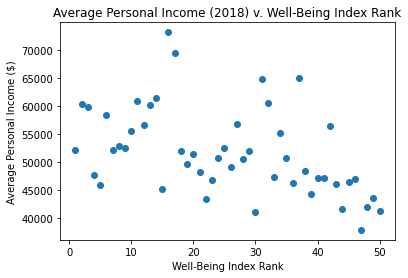

In [17]:
plt.scatter(well_being_index_rank, average_personal_income)

well_being_index_rank = np.arange(1, 50, 1)
average_personal_income = np.arange(15000.0, 80000.0, 1000.0)

# formatting
plt.xlabel('Well-Being Index Rank')
plt.ylabel('Average Personal Income ($)')
plt.title('Average Personal Income (2018) v. Well-Being Index Rank')

plt.show()

In [ ]:
#well_being_index_rank = Income_merge_df.iloc[:,3]
#average_personal_income = Income_merge_df.iloc[:,2]

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#from numpy import array

#Income_merge_df.reset_index().plot.scatter(x = 'Well-Being Index Rank', y = 'Average Personal Income')

# Data for plotting
#x = np.arange(15000.0, 80000.0, 1000.0)
#y = np.arange(1, 50, 1)

#Income_merge_df = Income_merge_df.loc[Income_merge_df["State",:]
                                      
#fig1, ax1 = plt.subplots(figsize=(15, 10))
#average_personal_income = Income_merge_df.groupby(['State'])


#marker_size=15
#plt.scatter([(well_being_index_rank, average_personal_income)],s=175, color="blue")
#plt.title('Well-Being Index Versus Average Personal Income',fontsize =25)
#plt.xlabel('2018',fontsize =14)
#plt.ylabel('Well-Being Index',fontsize =14)
#plt.xticks(x,['State'],rotation='vertical')

#plt.plot(x, y)
                                      
#plt.savefig("./Images/scatterplot.png", bbox_inches = "tight")
#plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 

corr=round(st.pearsonr(average_personal_income['average_personal_income ($)'],well_being_index_rank['Rank'])[0],2)
print(f"The correlation between Average Personal Income and a State's Well-Being Index Rank is {corr}")

In [ ]:
x_values = average_personal_income['Average Personal Income']
y_values = well_being_index_rank['well_being_index_rank']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

In [ ]:
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Personal Income ($)')
plt.ylabel('Well-Being Index Rank')

# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue}")
plt.savefig('Average Personal Income v. Well-Being Index Rank w regression')
plt.show()

In [ ]:
#Tax_merge_df = pd.merge(State_Tax_Rate_df, happiness_df, on='State', how='inner')
#Tax_merge_df

In [ ]:
#df = State_Tax_Rate_df
#del df["LineCode"]
#del df["Description"]
#del df["2018 sample size"]
#del df["Social"]
#del df["Community"]
#del df["Physical"]
#State_Tax_Rate_df

In [ ]:
#State_Tax_Rate_df.describe()

In [ ]:
#State_Tax_Rate_df = State_Tax_Rate_df.set_index('State')

In [ ]:
#well_being_index_rank = State_Tax_Rate_df.iloc[:,3]
#total_state_tax_rate = State_Tax_Rate_df.iloc[:,2]

In [ ]:
#plt.scatter(well_being_index_rank, total_state_tax_rate)

#well_being_index_rank = np.arange(1, 50, 1)
#total_state_tax_rate = np.arange(15000.0, 80000.0, 1000.0)

# formatting
#plt.xlabel('Well-Being Index Rank')
#plt.ylabel('Total State Tax Rate (%)')
#plt.title('Total State Tax Rate (%) (2018) v. Well-Being Index Rank')

#plt.show()

In [ ]:
#well_being_index_rank = State_Tax_Rate_df.iloc[:,3]
#total_state_tax_rate = State_Tax_Rate_df.iloc[:,2]

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#from numpy import array

#State_Tax_Rate_df.reset_index().plot.scatter(x = 'Well-Being Index Rank', y = 'Total State Tax Rate')

# Data for plotting
#x = np.arange(15000.0, 80000.0, 1000.0)
#y = np.arange(1, 50, 1)

#State_Tax_Rate_df = State_Tax_Rate_df.loc[State_Tax_Rate_df["State",:]
                                      
#fig1, ax1 = plt.subplots(figsize=(15, 10))
#State_Rank = State_Tax_Rate_df.groupby(['State'])


#marker_size=15
#plt.scatter([(well_being_index_rank, State_Tax_Rate_df)],s=175, color="blue")
#plt.title('Well-Being Index Versus Total State Tax Rate',fontsize =25)
#plt.xlabel('Total State Tax Rate',fontsize =14)
#plt.ylabel('Well-Being Index',fontsize =14)
#plt.xticks(x,['State'],rotation='vertical')

#plt.plot(x, y)
                                      
#plt.savefig("./Images/scatterplot1.png", bbox_inches = "tight")
#plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 

#corr=round(st.pearsonr(total_state_tax_rate['Tax Rate (%)'],well_being_index_rank['Rank'])[0],2)
#print(f"The correlation between Total State Tax Rate and a State's Well-Being Index Rank is {corr}")

In [ ]:
#x_values = total_state_tax_rate['Total State Tax Rate']
#y_values = well_being_index_rank['well_being_index_rank']

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

#print(f"slope:{slope}")
#print(f"intercept:{intercept}")
#print(f"rvalue (Correlation coefficient):{rvalue}")
#print(f"pandas (Correlation coefficient):{corr}")
#print(f"stderr:{stderr}")

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print(line_eq)

In [ ]:
#from scipy.stats import linregress
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Total State Tax Rate (%)')
#plt.ylabel('Well-being Index Rank')

# Print out the r-squared value along with the plot.

#print(f"The r-squared is: {rvalue}")
#plt.savefig('Total State Tax Rate v. Well-Being Index Rank w regression')
#plt.show()

In [ ]:
#Poverty_merge_df = pd.merge(Poverty_Rate_df, happiness_df, on='State', how='inner')
#Poverty_merge_df

In [ ]:
#df = Poverty_merge_df
#del df["LineCode"]
#del df["Description"]
#del df["2018 sample size"]
#del df["Social"]
#del df["Community"]
#del df["Physical"]
#Poverty_merge_df

In [ ]:
#Poverty_merge_df.describe()

In [ ]:
#Poverty_merge_df = Poverty_merge_df.set_index('State')

In [ ]:
#well_being_index_rank = Poverty_merge_df.iloc[:,3]
#Poverty_Rate = Poverty_merge_df.iloc[:,2]

In [ ]:
#plt.scatter(well_being_index_rank, Poverty_Rate)

#well_being_index_rank = np.arange(1, 50, 1)
#Poverty_Rate = np.arange(15000.0, 80000.0, 1000.0)

# formatting
#plt.xlabel('Well-Being Index Rank')
#plt.ylabel('State Poverty Rate (%)')
#plt.title('State Poverty Rate (2018) v. Well-Being Index Rank')

#plt.show()

In [ ]:
#well_being_index_rank = Poverty_merge_df.iloc[:,3]
#Poverty_Rate = Poverty_merge_df.iloc[:,2]

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#from numpy import array

#Poverty_merge_df.reset_index().plot.scatter(x = 'Well-Being Index Rank', y = 'State Poverty Rate')

# Data for plotting
#x = np.arange(15000.0, 80000.0, 1000.0)
#y = np.arange(1, 50, 1)

#Poverty_merge_df = Poverty_merge_df.loc[Poverty_merge_df["State",:]
                                      
#fig1, ax1 = plt.subplots(figsize=(15, 10))
#State_Rank = Poverty_merge_df.groupby(['State'])


#marker_size=15
#plt.scatter([(well_being_index_rank, Poverty_merge)],s=175, color="blue")
#plt.title('Well-Being Index Versus State Poverty Rate',fontsize =25)
#plt.xlabel('State Poverty Rate',fontsize =14)
#plt.ylabel('Well-Being Index',fontsize =14)
#plt.xticks(x,['State'],rotation='vertical')

#plt.plot(x, y)
                                      
#plt.savefig("./Images/scatterplot2.png", bbox_inches = "tight")
#plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 

#corr=round(st.pearsonr(poverty_rate['Poverty Rate (%)'],well_being_index_rank['Rank'])[0],2)
#print(f"The correlation between Poverty Rate and a State's Well-Being Index Rank is {corr}")

In [ ]:
#x_values = poverty_rate['State Poverty Rate']
#y_values = well_being_index_rank['well_being_index_rank']

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

#print(f"slope:{slope}")
#print(f"intercept:{intercept}")
#print(f"rvalue (Correlation coefficient):{rvalue}")
#print(f"pandas (Correlation coefficient):{corr}")
#print(f"stderr:{stderr}")

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print(line_eq)

In [ ]:
#from scipy.stats import linregress
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Poverty Rate (%)')
#plt.ylabel('Well-Being Index Rank')

# Print out the r-squared value along with the plot.

#print(f"The r-squared is: {rvalue}")
#plt.savefig('State Poverty Rate v Well-Being Index Rank w regression')
#plt.show()

In [ ]:
#Unemployment_merge_df = pd.merge(Unemployment_Rate_df, happiness_df, on='State', how='inner')
#Unemployment_merge_df

In [ ]:
#df = Unemployment_merge_df
#del df["LineCode"]
#del df["Description"]
#del df["2018 sample size"]
#del df["Social"]
#del df["Community"]
#del df["Physical"]
#Unemployment_merge_df

In [ ]:
#Unemployment_merge_df.describe()

In [ ]:
#Unemployment_merge_df = Unemployment_merge_df.set_index('State')

In [ ]:
#well_being_index_rank = Unemployment_merge_df.iloc[:,3]
#Unemployment_merge = Unemployment_merge_df.iloc[:,2]

In [ ]:
#plt.scatter(well_being_index_rank, Unemployment_merge)

#well_being_index_rank = np.arange(1, 50, 1)
#Unemployment_merge = np.arange(15000.0, 80000.0, 1000.0)

# formatting
#plt.xlabel('Well-Being Index Rank')
#plt.ylabel('Unemplyment Rate (%)')
#plt.title('Unemployment Rate (2018) v. Well-Being Index Rank')

#plt.show()

In [ ]:
#well_being_index_rank = Unemployment_merge_df.iloc[:,3]
#Unemployment_merge = Unemployment_merge_df.iloc[:,2]

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#from numpy import array

#Unemployment_merge_df.reset_index().plot.scatter(x = 'Well-Being Index Rank', y = 'Unemployment Rate')

# Data for plotting
#x = np.arange(15000.0, 80000.0, 1000.0)
#y = np.arange(1, 50, 1)

#Unemployment_merge_df = Unemployment_merge_df.loc[Income_merge_df["State",:]
                                      
#fig1, ax1 = plt.subplots(figsize=(15, 10))
#State_Rank = Unemployment_merge_df.groupby(['State'])


#marker_size=15
#plt.scatter([(well_being_index_rank, Unemployment_merge)],s=175, color="blue")
#plt.title('Well-Being Index Versus Unemplyment Rate',fontsize =25)
#plt.xlabel('Unemployment Rate',fontsize =14)
#plt.ylabel('Well-Being Index',fontsize =14)
#plt.xticks(x,['State'],rotation='vertical')

#plt.plot(x, y)
                                      
#plt.savefig("./Images/scatterplot3.png", bbox_inches = "tight")
#plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 

#corr=round(st.pearsonr(Unemployment_merge['Poverty Rate (%)'],well_being_index_rank['Rank'])[0],2)
#print(f"The correlation between Unemplyment Rate and a State's Well-Being Index Rank is {corr}")

In [ ]:
#x_values = Unemployment_rate['Unemplyment Rate']
#y_values = well_being_index_rank['well_being_index_rank']

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

#print(f"slope:{slope}")
#print(f"intercept:{intercept}")
#print(f"rvalue (Correlation coefficient):{rvalue}")
#print(f"pandas (Correlation coefficient):{corr}")
#print(f"stderr:{stderr}")

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print(line_eq)

In [ ]:
#from scipy.stats import linregress
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Unemplyment Rate (%)')
#plt.ylabel('Well-Being Index Rank')

# Print out the r-squared value along with the plot.

#print(f"The r-squared is: {rvalue}")
#plt.savefig('Unemployment Rate v. Well-Being Index Rank w regression')
#plt.show()